# Exercise 3:

1. Accept a user's name, age, and a list of their skills
2. Pass the state through three nodes that:
    - First node: Personalizes their name field with a greeting
    - Second node: Describe the user's age
    - Third node: Lists the user's skills in a formatted string
3. The final output in the result field should be a combined message. 

"Linda, welcome to the system! You are 31 years old! You have skills in Python, Machine Learning, and LangGraph"


In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph 

In [10]:
class AgentState(TypedDict): 
    name : str
    age : str
    skills : list[str]
    final : str

In [28]:
def greet(state: AgentState) -> AgentState:
    """
    This is the first node of our sequence.
    """
    state['final'] = f"{state['name']} welcome to the system! "
    return state


def describe(state: AgentState) -> AgentState:
    """
    This is the second node of our sequence.
    """
    state['final'] = state["final"] + f"You are {state['age']} years old! "
    return state

def readout(state: AgentState) -> AgentState:
    """
    This is the third node of our sequence.
    """
    skill_list = ', '.join(state['skills'])


    state['final'] = state["final"] + f"You have skills in: {skill_list}"
    return state


In [29]:
graph = StateGraph(AgentState)

graph.add_node("greet", greet)
graph.add_node("describe", describe)
graph.add_node("readout", readout)

graph.set_entry_point("greet")
graph.add_edge("greet", "describe")
graph.add_edge("describe", "readout")
graph.set_finish_point("readout")

app = graph.compile()

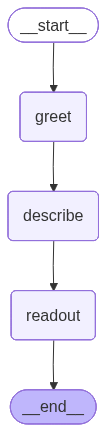

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
result = app.invoke({"name": "Linda ", 
                     "age": 31, 
                     "skills": ["Python", "Machine Learning", "LangGraph"]})

result["final"]

'Linda  welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'